# SVM (support vector machines)

# Morning
 - perfectly separable data
 - decision boundaries: dividing feature space into regions for classification
 - the maximum margin classifier
 - "support vectors"
 
# Afternoon
 - soft margins for inseparable data
 - the kernel trick for nonlinear decision boundaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from svm_ import find_support, plot_svm, plot_boundary

%matplotlib inline

In [2]:
X = np.load('data/svm_data.npy')
labels = np.load('data/svm_labels.npy')

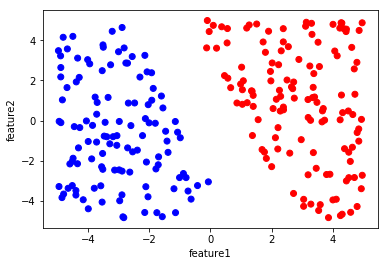

In [3]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='bwr')
plt.xlabel('feature1')
plt.ylabel('feature2');

## how can we classify this data?
- Think on your own about methods to classify this data

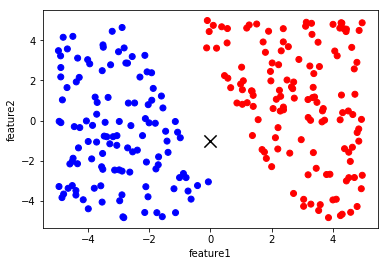

In [4]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='bwr')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.scatter(0, -1, s=150, marker = 'x', color='k');

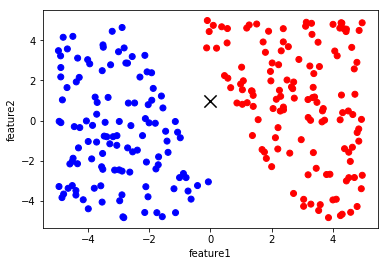

In [5]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='bwr')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.scatter(0, 1, s=150, marker = 'x', color='k');

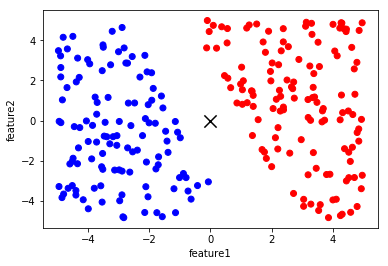

In [6]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='bwr')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.scatter(0, 0, s=150, marker = 'x', color='k');

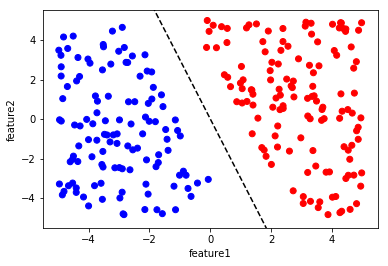

In [7]:
v = np.linspace(-5, 5)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='bwr')
plt.xlabel('feature1')
plt.ylabel('feature2')

plt.plot(v, -3 * v, 'k--')
plt.xlim(-5.5, 5.5)
plt.ylim(-5.5, 5.5);

## we want the line that best divides negative from positive

### could we get that line from logistic regression?


### ${{1}\over{1+e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}} = p$  
### $ e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)} = \frac{1}{p} - 1 $  
### $ \beta_0 + \beta_1 x_1 + \beta_2 x_2 = ln(\frac{1}{p}-1) $  
### $ x_2 = {ln(\frac{1}{p}-1)\over{\beta_2}}-({{\beta_1}\over{\beta_2}}x_1 + {{\beta_0}\over{\beta_2}})$  


### what is the problem with this plan for the above dataset?

In [8]:
def plot_decision(X, y, threshold=0.5, line_color='k'):
    colors = ['r' if i == 1 else 'b' for i in y]
    m = LogisticRegression().fit(X, y)
    mod = np.log(1. / threshold - 1) / m.coef_[0][1]
    slope = -1. * m.coef_[0][0] / m.coef_[0][1]
    intercept = -1. * m.intercept_[0] / m.coef_[0][1] + mod
    v = np.linspace(-5, 5, 100)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor=colors, cmap='bwr')
    plt.plot(v, slope * v + intercept, color=line_color)
    plt.xlabel('feature1')
    plt.ylabel('feature2')

    plt.ylim(-6, 6)
    plt.xlim(-6, 6)
    
    return slope, intercept

slope: -3.315, intercept: -0.107


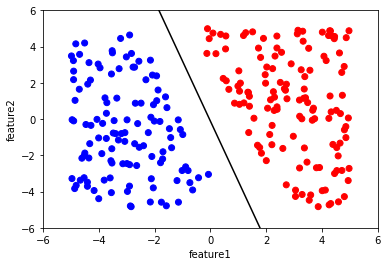

In [9]:
slope, intercept = plot_decision(X, labels)
print('slope: {:.3f}, intercept: {:.3f}'.format(slope, intercept))

## Are there other lines we could use to separate this data?

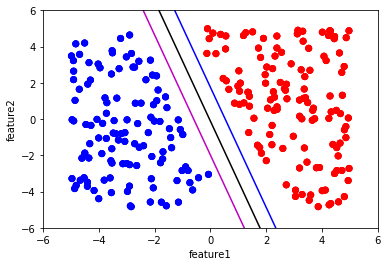

In [10]:
plot_decision(X, labels)
plot_decision(X, labels, 0.8, 'm')
plot_decision(X, labels, 0.2, 'b');

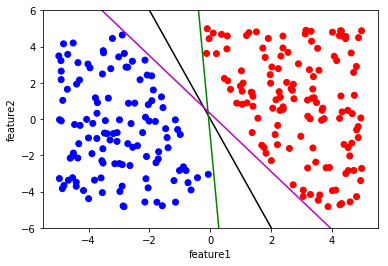

In [14]:
v = np.linspace(-5, 5)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='bwr')
plt.plot(v, -3. * v, 'k')
plt.plot(v, -18 * v - 1, 'g')
plt.plot(v, -1.6 * v + 0.3, 'm')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.ylim(-6, 6);

## what is unsatisfying about the green and magenta lines?

In fact there are an infinite number of lines that we could use to separate the data

## what conditions might we want to impose on the line?
- Discuss with your partner what we want this line to do

In [15]:
def make_plot(X, labels):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='bwr')

    v = np.linspace(-5, 5)
    plt.plot(v, -3 * v - 3.08, 'k')
    plt.plot(v, -3 * v + 3.08, 'k')
    plt.plot(v, -3 * v, 'k--')

    plt.xlabel('feature1')
    plt.ylabel('feature2')

    plt.ylim(-6, 6)
    pass


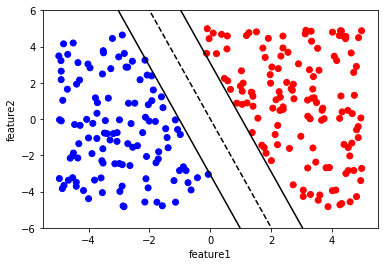

In [16]:
make_plot(X, labels)

## how can we turn this street idea into math?

for a plane through the origin, with normal vector $\vec{w}$, and an unknown point $\vec{u}$:  
if $\vec{w} \cdot \vec{u} > 0$ then point is on right side of plane  
if the plane is not through the origin, then there exists a b:  
if $\vec{w} \cdot \vec{u} + b> 0$ then the point is on the right side of plane

introduce notation for positive and negative:  
$y_i = 1 \iff y_i \text{ is a positive example}$  
$y_i = -1 \iff y_i \text{ is a negative example}$

then:  
$y_i * (\vec{w} \cdot \vec{u} + b) \ge 0$

## but what is this margin?
- State what the margin is in 1-2 sentences.
- Elaborate in your own words.
- Illustrate the margin with a picture, diagram, metaphor, or analogy.

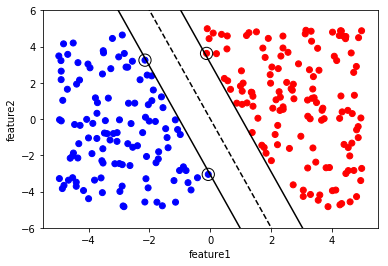

In [17]:
support, s_labels = find_support(X, -3, 0)
make_plot(X, labels)
plt.scatter(support[:, 0], support[:, 1], color='none', s=150, edgecolor='k');

we can assert we want:   
$y_i * (\vec{w} \cdot \vec{x}_i + b) \ge 1$  
where $\vec{x}_i$ is the set of points in our data set

and:  
$y_i * (\vec{w} \cdot \vec{x}_i + b) = 1 \text{ for } \vec{x}_i \text{ on the margin}^1$  
$^1$ on the margin is the point, or points, closest to the separating hyperplane  

## what is the error of this model?

## what does this mean for finding w (and b)?

## how wide is the margin?

the vector $ (\vec{x}_+ - \vec{x}_-)$, where $\vec{x}_+$ & $\vec{x}_-$ are support vectors for positive or negative examples, draws a line across the margin, but it's not perpendicular to the separating hyperplane

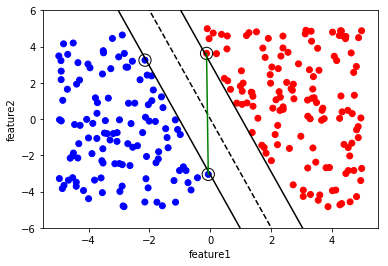

In [18]:
support,s_labels = find_support(X, -3, 0)
make_plot(X, labels)
plt.scatter(support[:, 0], support[:, 1], color='none', s=150, edgecolor='k')
plt.plot([support[0, 0], support[1, 0]], [support[0, 1], support[1, 1]], color='g');

### how can we formalize the width of our margin?
- discuss with your partner how we can determine the distance across the street

so, lets define:  
$width_\bot = (\vec{x}_+ - \vec{x}_-) \cdot {\vec{w}\over{||w||}}$

lets try and be a little tricky:  
$(y_+) (\vec{x}_+ \cdot \vec{w} + b) = 1$  
$(y_-) (\vec{x}_- \cdot \vec{w} + b) = 1$  
so:  
$\vec{x}_+ \cdot \vec{w} = 1 - b$  
$\vec{x}_- \cdot \vec{w} = -1 - b$  
so:  
$width_\bot = {(1 - b + 1 + b)\over{||w||}}$  
$width_\bot = {2\over{||w||}}$

That is really nice, now to make the biggest street possible we just need to maximize $2/||w||$  
or equivalently:  
minimize $\frac{1}{2}||w||^2$  
subject to $y_i(\vec{w} \cdot \vec{x}_i + b) \ge 1$  

The above is refered to as the *primal form*

## what does the primal form tell us about $\vec{w}$?
- discuss with your partner

## how do we maximize/minimize functions with constraints?

#### method of Lagrange multipliers
#### everyone's favorite constrained optimization


$$\mathscr{L} = \left(\frac{1}{2}\right) ||w||^2 - \sum_{i} \left[\alpha_i (y_i (\vec{w} \cdot \vec{x}_i + b)-1)\right]$$

## HAND WAVING

$$\min\limits_{\alpha \ge 0, \sum\limits_i[\alpha_i y_i] = 0} \left ( \frac{1}{2} \sum_{i,j} \left[\alpha_i \alpha_j  y_i  y_j  (\vec{x}_i \cdot \vec{x}_j) \right] - \sum_{i} \alpha_i \right )$$  

This is the *dual form*

to calculate $\vec{w}$ and $b$:  
$ \vec{w} = \sum_\limits{i} [\alpha_i y_i \vec{x}_i] $  
$ b = y_k - \vec{w} \cdot \vec{x}_k \text{ for any } \vec{x}_k \text{ with } \alpha_k \neq 0 $  

then, for an unknown point $\vec{u}$ we would check:  
$y_u = \text{sign}(\vec{w} \cdot \vec{u} + b)$  
  
we can update our prediction function to:  
$y_u = \text{sign}(\sum\limits_i [\alpha_i y_i (\vec{x}_i \cdot \vec{u})] + b)$

The minimization is now a quadratic optimization in $\alpha$  

importantly this, and the decision function, only depend on the dot products of our input data, we will talk more about what that means this afternoon

## what did we just do?

## what effect do non-support vector points have on our model?
a. They change $\vec{w}$  
b. They change b  
c. They change $\vec{w}$ and b  
d. They do nothing  

- discuss with partner

In [ ]:
def plot_svc_decision(svc, show=True):
    # get the separating hyperplane
    w = svc.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (svc.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1. / np.sqrt(np.sum(svc.coef_ ** 2))
    mod = margin * np.sqrt(a**2 + 1)
    yy_down = yy + mod
    yy_up = yy - mod

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'y--')
    plt.plot(xx, yy_down, 'k')
    plt.plot(xx, yy_up, 'k')
    
    if show:
        print('slope of decision boundary: {}'.format(a))
        print('margin width: {}'.format(2 * margin))

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X, labels)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='bwr')
plot_svc_decision(svc, True)
svc_sp = svc.support_vectors_

plt.scatter(svc_sp[:, 0], svc_sp[:, 1], color='none', s=150, edgecolor='k')

plt.ylim(-6, 6);

In [ ]:
print(svc.support_vectors_)
print('-' * 28)
print(X[svc.support_])

In [ ]:
print(svc.coef_)
for ind in svc.support_:
    b = labels[ind] - svc.coef_[0].dot(X[ind])
    print(b)
print(svc.intercept_)

## is this a high bias or high variance model?
    a. high bias  
    b. high variance

- discuss in pairs

### what problems might come from our data?

In [ ]:
X[:, 1] = X[:, 1] * 1500
svc = SVC(kernel='linear')
svc.fit(X, labels)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='bwr')
plot_svc_decision(svc, True)
svc_sp = svc.support_vectors_

plt.scatter(svc_sp[:, 0], svc_sp[:, 1], color='none', s=150, edgecolor='k')

plt.ylim(-6 * 1500, 6 * 1500)
X[:, 1] = X[:, 1] / 1500

In [ ]:
print(svc.support_vectors_)
print(svc.coef_[0])
print(svc.intercept_)

# afternoon
## soft margins and kernels

In [ ]:
Xi = np.load('data/svm_data_insep.npy')
labelsi = np.load('data/svm_labels_insep.npy')

In [ ]:
def add_point_and_plot(x, labels, new_point, new_label, c=10000):
    xa = np.vstack((X,new_point))
    labelsa = np.append(labels, new_label)
    svc2 = SVC(C=c, kernel='linear')
    svc2.fit(xa, labelsa)

    plt.scatter(xa[:, 0], xa[:, 1], c=labelsa, cmap='bwr')
    plot_svc_decision(svc2, True)
    print('accuracy: {}'.format(svc2.score(Xi, labelsi)))
    plt.ylim(-6, 6)
    pass

In [ ]:
add_point_and_plot(X, labels, [2, -4.5], -1, c=.1)

In [ ]:
plt.scatter(Xi[:, 0], Xi[:, 1], c=labelsi, cmap='bwr');

## what now?
### can we use maximum margin for this data?
- discuss in pairs what we can do

instead of looking at $y_i * (\vec{w} \cdot \vec{u} + b) \ge 0$  
we use $y_i * (\vec{w} \cdot \vec{u} + b) \ge 1 - \xi_i$  
$\xi_i$ are called slack variables  
  
they penalize samples that are either within the margin, or even on the wrong side of the boundary  
  
the resulting classifier, a soft-margin svm, now makes trade off between maximizing correct classification and making the widest possible margin 

In [ ]:
svc2 = SVC(C=1, kernel='linear')
svc2.fit(Xi, labelsi)

plt.scatter(Xi[:, 0], Xi[:, 1], color=colors)
plot_svc_decision(svc2, True)
# svc_sp = svc2.support_vectors_

# plt.scatter(svc_sp[:,0],svc_sp[:,1],color='none',s=150,edgecolor='k')
print 'accuracy: {}'.format(svc2.score(Xi, labelsi))
plt.ylim(-6, 6)
pass

## what are the support vectors now?

In [ ]:
svc2 = SVC(C=1, kernel='linear')
svc2.fit(Xi, labelsi)

plt.scatter(Xi[:, 0], Xi[:, 1], color=colors)
plot_svc_decision(svc2, True)
svc_sp = svc2.support_vectors_

plt.scatter(svc_sp[:, 0], svc_sp[:, 1], color='none', s=150, edgecolor='k')
print 'accuracy: {}'.format(svc2.score(Xi, labelsi))
plt.ylim(-6, 6)
pass

## what is this C paramater i'm using now?

In [ ]:
svc2 = SVC(C=0.01, kernel='linear')
svc2.fit(Xi, labelsi)

plt.scatter(Xi[:, 0], Xi[:, 1], color=colors)
plot_svc_decision(svc2, True)
svc_sp = svc2.support_vectors_

plt.scatter(svc_sp[:, 0], svc_sp[:, 1], color='none', s=150, edgecolor='k')
print 'accuracy: {}'.format(svc2.score(Xi, labelsi))
plt.ylim(-6, 6)
pass

In [ ]:
svc2 = SVC(C=1, kernel='linear')
svc2.fit(Xi, labelsi)

plt.scatter(Xi[:, 0], Xi[:, 1], color=colors)
plot_svc_decision(svc2, True)
svc_sp = svc2.support_vectors_

plt.scatter(svc_sp[:, 0], svc_sp[:, 1], color='none', s=150, edgecolor='k')
print 'accuracy: {}'.format(svc2.score(Xi, labelsi))
plt.ylim(-6, 6)
pass

the optimization problem changes to:  
minimize: $\frac{1}{2}||w||^2 + C\sum\limits_i\xi_i$  
constraint: $y_i * (\vec{w} \cdot \vec{u} + b) \ge 1 - \xi_i$

### what does modifying C achieve in this context?

### can you think of something similar to C we have seen before?

### what is the relationship between C and $\lambda$?

### dual form looks (almost) the same:

$$\min\limits_{0 \le \alpha \le C, \sum\limits_i[\alpha_i y_i] = 0} \left ( \frac{1}{2} \sum_{i,j} \left[\alpha_i \alpha_j  y_i  y_j  (\vec{x}_i \cdot \vec{x}_j) \right] - \sum_{i} \alpha_i \right )$$ 

we have introduced a maximum value on the alphas
this allows for misclassifications, and for wider margins

## why does setting a limit on $\alpha$ allow for misclassifications?

## was C involved this morning?

In [ ]:
svct = SVC(C=10000, kernel='linear')
svct.fit(X, labels)

plt.scatter(X[:, 0], X[:, 1], color=colors)
plot_svc_decision(svct, True)
svc_sp = svct.support_vectors_

plt.scatter(svc_sp[:, 0], svc_sp[:, 1], color='none', s=150, edgecolor='k')
plt.ylim(-6, 6)
pass

In [ ]:
add_point_and_plot(X, labels, [2.3, -4.5], -1, c=1000)

## kernel trick

## what would i do with the data i just drew on the board?
(notice how i cleverly worded the question to remind myself to draw on the board?)

remember our optimization and decision rule:

$\max\limits_{0 \le \alpha \le C, \sum\limits_i[\alpha_i y_i] = 0} \left (\sum_{i} \alpha_i - \left(\frac{1}{2}\right) \sum_{i,j} \left[\alpha_i \alpha_j  y_i  y_j  (\vec{x}_i \cdot \vec{x}_j) \right]\right )$  
$y_u = sign(\sum\limits_i [\alpha_i y_i (\vec{x}_i \cdot \vec{u})] + b)$

## kernels

kernel functions allow us to get the result of the dot product of vectors after being transformed to a higher dimensional space, without actually needing to know what that transformation is  

$\Phi(\vec{x})$ is some transformation from space of dimension d to space of dimenstion d+n  
then $K(\vec{x}_1,\vec{x}_2) = \langle\Phi(\vec{x}_1),\Phi(\vec{x}_2)\rangle$

since our decision rule and optimization only depend on dot products between our input data we can use kernels to transform our data to higher dimensions, without having to explicitly compute the transformed data

There are many kernels to potentially use, but some of the most common
are:  
  
linear:  
$K(\vec{x}_i,\vec{x}_j) = \vec{x}_i \cdot \vec{x}_j$  
  
polynomial (of degree d):  
$K(\vec{x}_i,\vec{x}_j) = (1 + \vec{x}_i \cdot \vec{x}_j)^d$  
  
radial basis function (gaussian):  
$K(\vec{x}_i,\vec{x}_j) = \exp(\gamma * ||\vec{x}_i - \vec{x}_j||^2)$

![](http://rvlasveld.github.io/images/oc-svm/visualization.gif)

In [ ]:
svct = SVC(C=0.01, kernel='poly')
svct.fit(Xi, labelsi)

plt.scatter(Xi[:, 0], Xi[:, 1], color=colors)
plot_boundary(svct, Xi)
# svc_sp = svct.support_vectors_

# plt.scatter(svc_sp[:, 0], svc_sp[:, 1], color='none', s=150, edgecolor='k')
plt.ylim(-6, 6)
pass

In [ ]:
with open('rbf_data3.pkl', 'r') as f:
    x_rbf, y_rbf = pickle.load(f)
with open('rbf_labels3.pkl', 'r') as f:
     labels_rbf = pickle.load(f)
        
colors_rbf = [c1 if i == 1 else c2 for i in labels_rbf]
X_rbf = np.array([x_rbf, y_rbf]).T

In [ ]:
plt.scatter(X_rbf[:, 0], X_rbf[:, 1], color=colors_rbf)
pass

In [ ]:
svm = SVC(C=1, gamma=0.1).fit(X_rbf, labels_rbf)
plot_boundary(svm, X_rbf)
plt.scatter(X_rbf[:, 0], X_rbf[:, 1], color=colors_rbf)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
pass

In [ ]:
svm = SVC(C=1, gamma=1).fit(X_rbf, labels_rbf)
plot_boundary(svm, X_rbf)
plt.scatter(X_rbf[:, 0], X_rbf[:, 1], color=colors_rbf)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
pass

In [ ]:
for g in [0.1, 0.3, 1, 3, 10]:
    plt.figure()
    svm = SVC(C=1, gamma=g).fit(X_rbf, labels_rbf)
    plot_boundary(svm, X_rbf)
    plt.scatter(X_rbf[:, 0], X_rbf[:, 1], color=colors_rbf)

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

In [ ]:
svm = SVC(C=1, gamma=250).fit(X_rbf, labels_rbf)
plot_boundary(svm, X_rbf)
plt.scatter(X_rbf[:, 0], X_rbf[:, 1], color=colors_rbf)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
pass

### what is happening as $\gamma$ varies

### does C interact with $\gamma$

In [ ]:
plt.figure()
svm = SVC(C=0.1, gamma=.3).fit(X_rbf, labels_rbf)
plot_boundary(svm, X_rbf)
plt.scatter(X_rbf[:, 0], X_rbf[:, 1], color=colors_rbf)

plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [ ]:
for c in [1E-1, 1, 10, 100, 1000, 10000]:
    plt.figure()
    svm = SVC(C=c, gamma=10).fit(X_rbf, labels_rbf)
    plot_boundary(svm, X_rbf)
    plt.scatter(X_rbf[:, 0], X_rbf[:, 1], color=colors_rbf)

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

### how do we find optimum hyperparameters?
- discuss with partner

## grid search

![grid search](ryan_grid.png)

## what happens in grid search?

## is grid search a good idea?

## multiclass

two main methods are used for multiclass svm:  
**one vs all:** train N models, assign points based on which model has largest value for $\vec{w} \cdot \vec{x} + b$    
**one vs one:** train $N * (N-1)\over{2}$ models, assign points based on majority vote of classes it has been assigned

### discuss with partner benifits and drawbacks of 1-1 and 1-all strategies

## final notes/thoughts

- svm algorithm is ~$O(\text{max}(\text{rows, cols})^2 * \text{min}(\text{rows, cols}))$ [i couldn't find clear numbers on this, but regardless of specifics it is rather slow]  
- however, solution space can end up being very sparse, which is useful for situations where p >> n  
- be careful using svm on very large data sets  
- the rbf kernel is very powerful, but also prone to overfitting, use with caution  
- in researching this lecture i discovered that people do all kinds of interesting/crazy things with svm  
    - single class svms can be used for anonomly/outlier detection (is implemented in sklearn)  
    - svm clustering is something that exists, but that i still don't really have a good handle on  
    - svm regression is done, also not entirely sure how that works  
    - you can include multiclass and cross validation scores in the dual space optimization algorithm, although i am not suggesting anyone actually try this  
    - i found some pretty extensive discussion of svm's used with genomic data, not sure if this is actually wide spread or there is just a vocal subset of users  
- it is not really possible to get probabilites out of svm models, which is annoying as people often want probabilities  
- svm's have a natural fit with problems where there is a natural sense of the margin
   